# CS 109A/AC 209A/STAT 121A Data Science: Homework 2
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 21st, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW2.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**


Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [4]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Keery, Sean]

### Part (b): Course Number

[CS 109a]

### Part (c): Who did you work with?

[Rick Farmer]

---

## Problem 1: Inside the Models in Scikit-learn

In this problem, we will be implementing K-Nearest Neighbour and simple linear regression for predicting a quantitative variable. We will compare the performance of our implementation with those of Scikit-learn (``sklearn``).

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y. 

### Part (a): Implement the models by hand
In this part you **may not** use ``sklearn`` for any task.

In the following, you may use ``numpy`` arrays instead of ``pandas`` dataframes.

- Implement a funtion ``split``, which satifies:
    - input: an ``nx2`` dataframe ``data``, a float ``m``
    - return: an ``nx2`` dataframe ``train`` and an ``nx2`` dataframe ``test``, consisting of ``m`` percent and ``100 - m`` percent of the data, respectively.


- Implement K-Nearest Neighbour for predicting a quantitative variable. That is, write a function, ``knn_predict``, that satisfies:
    - input: an integer ``k``, an ``n x 2`` dataframe training set ``train``, an ``n x 1`` dataframe testing set ``test``
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.



- Implement linear regression for predicting a quantitative variable. That is, write a function ``linear_reg_fit`` that satisfies:
    - input: an ``nx2`` dataframe training set ``train``
    - return: the coefficients of the linear regression model - a float ``slope`` and a float ``intercept``.
    
    
- Write a function ``linear_reg_predict`` that satisfies:
    - input: an ``nx1`` dataframe testing set ``test``, as well as the coefficients of the linear regression model
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.
    
    
- Implement a function ``score`` that satisfies:
    - input: an ``nx2`` dataframe ``predicted``, an ``nx2`` dataframe ``actual`` 
    - return: R^2 coefficient of the fit of the predicted values.

**Solution:**

In [68]:
# Implement a funtion split, which satifies:
# input: an nx2 dataframe data, a float m
# return: an nx2 dataframe train and an nx2 dataframe test, consisting of m percent and 100 - m percent of the data, respectively.
def my_split(data,m):
    #find the number of records dataframe
    length = data.shape[0]
    #build a list of integer indices for records in dataframe
    indices = range(length)
    #randomly shuffle the indices
    np.random.shuffle(indices)
    
    #convert m to float for division
    m = float(m)
    #print m
    
    #create percentages
    train_percent = m/100
    #print train_percent
    test_percent = 1-train_percent
    
    #take percentage of the shuffled list of indices for training
    train_indices = indices[0:int(length * train_percent)]
    #take the remainder the shuffled list of indices for testing
    test_indices = indices[int(length * test_percent):]
    
    #get the records for the training indices
    train = data.iloc[train_indices, :]
    #get the records for the testing indices
    test = data.iloc[test_indices, :]
    
    
    return train,test

In [123]:
# Implement K-Nearest Neighbour for predicting a quantitative variable. That is, write a function, knn_predict, that satisfies:
# input: an integer k, an n x 2 dataframe training set train, an n x 1 dataframe testing set test
# return: an nx2 dataframe, whose first column is that of test and whose second column is the predicted values.
# def knn_predict(k,train,test):
#     #create dataframe with just biometric and disease subtype info
#     biometric_df = train[['x', 'y']]
    
#     #we'll build a list of the nearest neighbour for each of our test points
#     nearest_neighbours = []
    
#     #iterate through the rows in the test data
#     for index, test_row in test.iterrows():
#         #for each test patient, store the distance between all training points and test point in an series
#         distances = ((train['x'] - test_row['x'])**2 
#                      + (train['x'] - test_row['x'])**2)
        
#         #find the row label of the training point that is the closest to the test point
#         nearest = distances.idxmin()
        
#         #add the nearest neighbour for the current test point to our list
#         nearest_neighbours.append(nearest)
        
#     #get the disease subtype of the closest neighbour of each test point
#     predicted_subtypes = train.loc[nearest_neighbours]['y'].values
    
#     return predicted_subtypes
    
#     #create response dataframe
#     knn.response(columns=['test_value','predicted_value'])
    
#     return knn_response
def knn_classify(train, test):
    #create dataframe with just biometric and disease subtype info
    biometric_df = train[['x', 'y']]
    
    #group the records in dataframe by 'subtype' and compute mean
    mean_df = biometric_df.groupby('x').mean()
    
    #converts row labels like 0.0, 1.0 to string (this will save us indexing headaches)
    mean_df.index = mean_df.index.map(str)
    
    #iterate through the rows in the mean dataframe
    for index, mean in mean_df.iterrows():
        #for each cluster mean, store the distance between all test points and mean
        #in new column labeled by the cluster number
        test.loc[:, index] = ((test['y'] - mean['x'])**2 )
 
    #now the dataframe "test" has four new columns: 0, 1, 2, 3
    #the n-th value in the 0 column represents the distance btw the
    #n-th data point and the 0-th cluster mean
    
    #get the columns from test that are store the distances to the cluster means
    distances = test[mean_df.index]
    
    #for each record, get the labels on the column that stores the minimum distance
    predicted_subtypes = distances.idxmin(axis=1).values
    
    #converts row labels like 0.0, 1.0 from string back to float (to make arithmetic easier)
    predicted_subtypes = predicted_subtypes.astype(float) 
    
    return predicted_subtypes

In [ ]:
# Implement linear regression for predicting a quantitative variable. That is, write a function linear_reg_fit that satisfies:
# input: an nx2 dataframe training set train
# return: the coefficients of the linear regression model - a float slope and a float intercept.
def linear_reg_fit(train):
    
    
    retun lr_slope,lr_intercept

In [ ]:
# Write a function linear_reg_predict that satisfies:
# input: an nx1 dataframe testing set test, as well as the coefficients of the linear regression model
# return: an nx2 dataframe, whose first column is that of test and whose second column is the predicted values.
def linear_reg_predict(test,lr_slope,lr_intercept):
    lr.response(columns=['test_value','predicted_value'])
    
    return lr_response

In [85]:
# Implement a function score that satisfies:
# input: an nx2 dataframe predicted, an nx2 dataframe actual
# return: R^2 coefficient of the fit of the predicted values.
def score(df_predicted,df_actual):
    #subtract the array of predicted subtypes and the array of true subtypes
    comparison = df_predicted - df_actual
    
    #when the predicted value is different from the true value, that entry is non-zero
    #we set all non-zero entries (wrong predictions) to 1
    comparison[comparison != 0] = 1
    
    #the total number of wrong predictions is the sum of the array (where entries have a 1
    #for wrong and 0 for right)
    total_wrong = comparison.sum()
    
    right_percent = (len(comparison) - total_wrong) / (len(comparison) * 1.0)
    
    return r

### Part (b): Compare with ``sklearn``

- Load the contents of ``dataset_1_full.txt`` into a ``pandas`` dataframe, or ``numpy`` array. 


- Use your functions from Part (a) to split the data into training and testing sets (70-30). Evaluate how KNN and linear regression each perform on this dataset.


- Use ``sklearn`` to split the data into training and testing sets (70-30). Use ``sklearn`` to evaluate how KNN and linear regression each perform on this dataset.


- Use Python's ``time`` library to measure how well your implementations compare with that of ``sklearn``. What can you do (algorithmically or codewise) to make your implementation faster or more efficient?

**Solution:**

In [7]:
# Load the contents of dataset_1_full.txt
#read data into pandas df
df = pd.read_csv('dataset/dataset_1_full.txt')

#size of data frame
print 'number of rows:', df.shape[0]

#print first 5 rows of dataframe
df.head(n=5)

number of rows: 500


,x,y
0,0.177418,1.401178
1,0.573076,3.489890
2,0.503775,1.684924
3,0.594027,3.898209
4,0.335754,2.878410


In [28]:
# use functions from Part (a) to split the data into training and testing sets (70-30)
train,test=my_split(df,70)
train.head()

,x,y
377,0.169095,1.887931
157,0.888477,3.754016
387,0.398479,3.210031
140,0.978806,5.561542
354,0.411623,0.108954


In [127]:
#Evaluate how my KNN and linear regression each perform on this dataset.
knn_response= knn_predict(k,train,test)
# print knn_response
knn_score =score(knn_response,df)
print knn_score

ValueError: operands could not be broadcast together with shapes (350,) (500,2) 

In [63]:
#Use sklearn to split the data into training and testing sets (70-30).
test,train = sk_split(df,train_size=.7)
test.head()

,x,y
485,0.487418,3.820174
479,0.410898,2.453266
173,0.341110,2.025198
111,0.693779,5.306250
13,0.261920,3.434822


In [64]:
# Use sklearn to evaluate how KNN performs on this dataset.
# # put data in format usable by sklearn
#  X = [[0], [1], [2], [3]]
#  y = [0, 0, 1, 1]
x_train = train.as_matrix(columns=['x'])
# print x_train
y_train = train['y'].values
# print y_train
x_test = test.as_matrix(columns=['x'])
y_test = test['y'].values

#set number of nearest neighbouts
k=5

# create knn model
neighbours=KNN(n_neighbors=k)

#set parameter of model
neighbours.fit(x_train,y_train)

#predict y responses
predicted_y=neighbours.predict(x_test)

#score
r=neighbours.score(x_test,y_test)
print r

0.300828808615


In [65]:
# Use sklearn to evaluate how linear regression performs on this dataset
lr=Lin_Reg()
lr.fit(x_train,y_train)
predicted_y=lr.predict(x_test)
r=lr.score(x_test,y_test)
print r

0.384372651493


In [130]:
# Use Python's time library to measure how well your implementations compare with that of sklearn. 
# http://pythoncentral.io/time-a-python-function/
import timeit
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

# measure sk_learn split
wrapped = wrapper(sk_split, df,train_size=.7)
sk_split_duration=timeit.timeit(wrapped,number=1)
# wrapped_knn = wrapper(knn_classify,test,train)
# measure my_learn split
my_wrapped = wrapper(my_split,df,70)
my_split_duration=timeit.timeit(my_wrapped,number=1)
# my_knn_wrapped = wrapper(knn_classify,test,train)
# my_knn_duration=timeit.timeit(my_knn_wrapped,number=1)
print "my_split: ", my_split_duration,";sk_learn_split:",sk_split_duration,";my_knn:"#,my_knn_duration


 my_split:  0.00128817558289 ;sk_learn_split: 0.00128388404846 ;my_knn:


### What can you do (algorithmically or codewise) to make your implementation faster or more efficient?
I probably could use a lambda instead of a loop to speed up the processing.  Decomposition into more functions would probably help with memory usage.  

## Problem 2: Handling Missing Data

In this problem, we will be handling the problem of datasets with missing values. Clearly, we cannot simply remove entire rows or columns that contain missing values. In this problem, we explore two different ways to fill in missing values.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

The files ``dataset_1_missing.txt`` to ``dataset_6_missing.txt`` contains rows that are missing their y-values, where as ``dataset_1_full.txt`` to ``dataset_6_full.txt`` contain datasets with all y-values correctly filled in.

In this problem, you **may not** use ``sklearn`` or build-in ``pandas`` functions to **directly fill in missing values**. Usage of these libraries/pakcages for related tasks is fine.

### Part (a): Model Based Data Imputation

- Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set.


- Implement your scheme. That is, write code (preferably a function ``fill`` or two functions ``fill_knn``, ``fill_lin_reg``), which takes an ``n x 2`` dataframe or array with values missing in the 2nd column and fills in these values using KNN and linear regression. 


- You need to, also, write code to evaluate the quality of the values you've filled in.

**Solution:**

### Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set
Predictive models can be used to fill in missing values in a few different ways.  The function to identifying nearest neigbors can do this by identifying values which would be closest to the missing data, and suggesting what the value should be based on an estimage taken by adding those values and dividing by the number of neighbors.  By plotting a line against the scatter plot of the data, we can look at a value on the known axis and find where it would intersect that line to give us our predicted value.


In [78]:
#--------  fill_knn
#input: missing_df (dataframe), full_df (dataframe), no_y_ind (indices of missing values), 
#       with_y_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)

def fill_knn(missing_df, full_df, no_y_ind, with_y_ind, k):
    #preparing data in array form
    x_train = missing_df.loc[with_y_ind, 'x'].values
    x_train = x_train.reshape((len(with_y_ind), 1))
    y_train = missing_df.loc[with_y_ind, 'y'].values
    x_test = missing_df.loc[no_y_ind, 'x'].values.reshape((len(no_y_ind), 1))
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit knn model
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_train, y_train)
    
    #predict y-values
    predicted_y = neighbours.predict(x_test)
    
    #score predictions
    r = neighbours.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r

#--------  fill_ling_reg
#input: missing_df (dataframe), full_df (dataframe), no_y_ind (indices of missing values), 
#       with_y_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)


def fill_lin_reg(missing_df, full_df, no_y_ind, with_y_ind):
    #preparing data in array form
    x_train = missing_df.loc[with_y_ind, 'x'].values.reshape((len(with_y_ind), 1))
    y_train = missing_df.loc[with_y_ind, 'y'].values
    x_test = missing_df.loc[no_y_ind, 'x'].values.reshape((len(no_y_ind), 1))
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit linear model
    regression = Lin_Reg()
    regression.fit(x_train, y_train)
    
    #predict y-values
    predicted_y = regression.predict(x_test)
    
    #score predictions
    r = regression.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r

### Part (b): Which Model is Better?

- For datasets ``dataset_1_missing.txt`` to ``dataset_6_missing.txt``, compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization (the correct y-values are contained in ``dataset_1_full.txt`` to ``dataset_6_full.txt``).. 


- Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly). Explain in detail exactly what might cause each model to fail or perform well. 



- Using ``dataset_1_missing.txt``, explain the impact of the choice of $k$ on the performance of KNN. 


Use numerical analysis and data visualization to support every part of your argument.

**Solution:**

In [80]:
#--------  plot_missing
#input: ax1 (axes), ax2 (axes), 
#       predicted_knn (nx2 dataframe with predicted vals), r_knn (float),
#       predicted_lin (nx2 dataframe with predicted vals), r_lin (float), 
#       k (integer),
#       no_y_ind (indices of rows with missing y-values),
#       with_y_ind (indices of rows with no missing y-values)
#output: ax1 (axes), ax2 (axes)

def plot_missing(ax1, ax2, predicted_knn, r_knn, predicted_lin, r_lin, k, no_y_ind, with_y_ind):
    ax1.scatter(predicted_knn.loc[with_y_ind]['x'].values, 
                predicted_knn.loc[with_y_ind]['y'].values, 
                color='blue')

    ax1.scatter(predicted_knn.loc[no_y_ind]['x'].values, 
                predicted_knn.loc[no_y_ind]['y'].values, 
                color='red')

    ax1.set_title('KNN, R^2:' + str(r_knn))

    ax2.scatter(predicted_lin.loc[with_y_ind]['x'].values, 
                predicted_lin.loc[with_y_ind]['y'].values,
                color='blue')

    ax2.scatter(predicted_lin.loc[no_y_ind]['x'].values, 
                predicted_lin.loc[no_y_ind]['y'].values, 
                color='green')

    ax2.set_title('Lin Reg, R^2:' + str(r_lin))
    
    return ax1, ax2

In [88]:
# #number of neighbours
# k=10

# ### CODING TIP: You have to generate data for six different datasets, is it a good idea
# ### to copy and paste the same block of code over and over again for six times? 
# ### How can you get around this?
# ### For HW2 it's still ok to copy and paste, for HW3, we will need you to see where functional
# ### abstraction and iteration are called for and implement them.


# #plot predicted points
# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

# #create function to loop through all files in directory
# #or maybe just take the number of files in the set as the parameter
# # inputs: filenames or directory or number of files
# # return: datasets
# def dataset_creation(input):

# #create function to loop through datasets and plot results

# #Read dataset 1
# missing_df = pd.read_csv('./dataset/dataset_1_missing.txt')
# full_df = pd.read_csv('./dataset/dataset_1_full.txt')

# no_y_ind = missing_df[missing_df['y'].isnull()].index
# with_y_ind = missing_df[missing_df['y'].notnull()].index

# predicted_knn, r_knn = fill_knn(missing_df, 
#                                 full_df, 
#                                 no_y_ind, 
#                                 with_y_ind, 
#                                 k)

# predicted_lin, r_lin = fill_lin_reg(missing_df, 
#                                     full_df, 
#                                     no_y_ind, 
#                                     with_y_ind)

# ax5, ax6 = plot_missing(ax5, 
#                         ax6, 
#                         predicted_knn, r_knn,
#                         predicted_lin, r_lin,
#                         k,
#                         no_y_ind, 
#                         with_y_ind)

# #Read dataset 4
# missing_df = pd.read_csv('./dataset/dataset_4_missing.txt')
# full_df = pd.read_csv('./dataset/dataset_4_full.txt')

# no_y_ind = missing_df[missing_df['y'].isnull()].index
# with_y_ind = missing_df[missing_df['y'].notnull()].index

# predicted_knn, r_knn = fill_knn(missing_df, 
#                                 full_df, 
#                                 no_y_ind, 
#                                 with_y_ind, 
#                                 k)

# predicted_lin, r_lin = fill_lin_reg(missing_df, 
#                                     full_df, 
#                                     no_y_ind, 
#                                     with_y_ind)

# ax1, ax2 = plot_missing(ax1, 
#                         ax2, 
#                         predicted_knn, r_knn,
#                         predicted_lin, r_lin,
#                         k,
#                         no_y_ind, 
#                         with_y_ind)

# #Read dataset 6
# missing_df = pd.read_csv('./dataset/dataset_6_missing.txt')
# full_df = pd.read_csv('./dataset/dataset_6_full.txt')

# no_y_ind = missing_df[missing_df['y'].isnull()].index
# with_y_ind = missing_df[missing_df['y'].notnull()].index

# predicted_knn, r_knn = fill_knn(missing_df, 
#                                 full_df, 
#                                 no_y_ind, 
#                                 with_y_ind, 
#                                 k)

# predicted_lin, r_lin = fill_lin_reg(missing_df, 
#                                     full_df, 
#                                     no_y_ind, 
#                                     with_y_ind)

# ax3, ax4 = plot_missing(ax3, 
#                         ax4, 
#                         predicted_knn, r_knn,
#                         predicted_lin, r_lin,
#                         k,
#                         no_y_ind, 
#                         with_y_ind)

# plt.show()

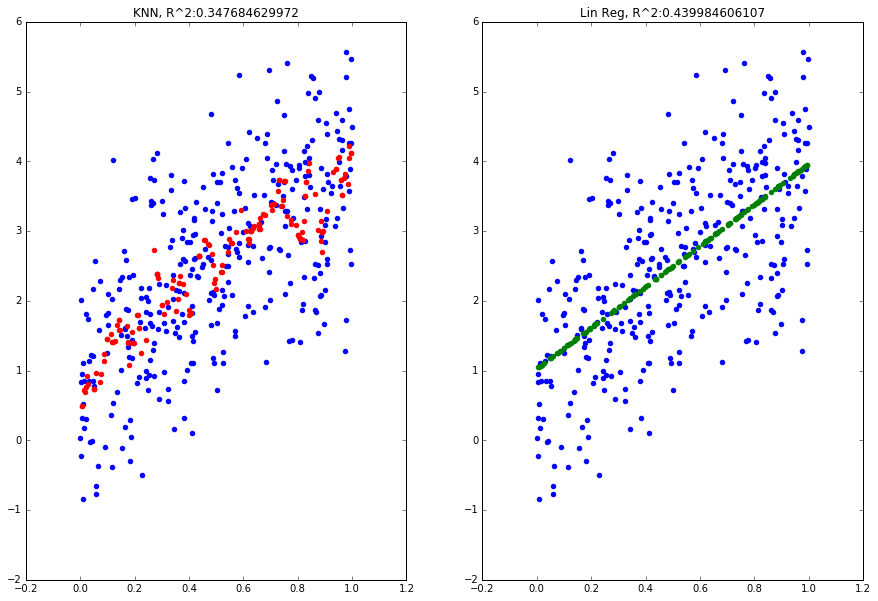

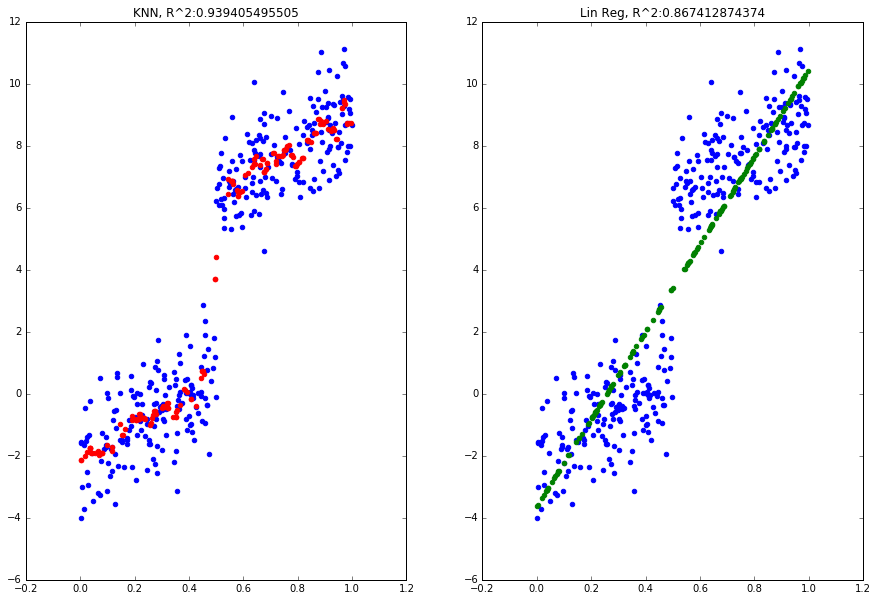

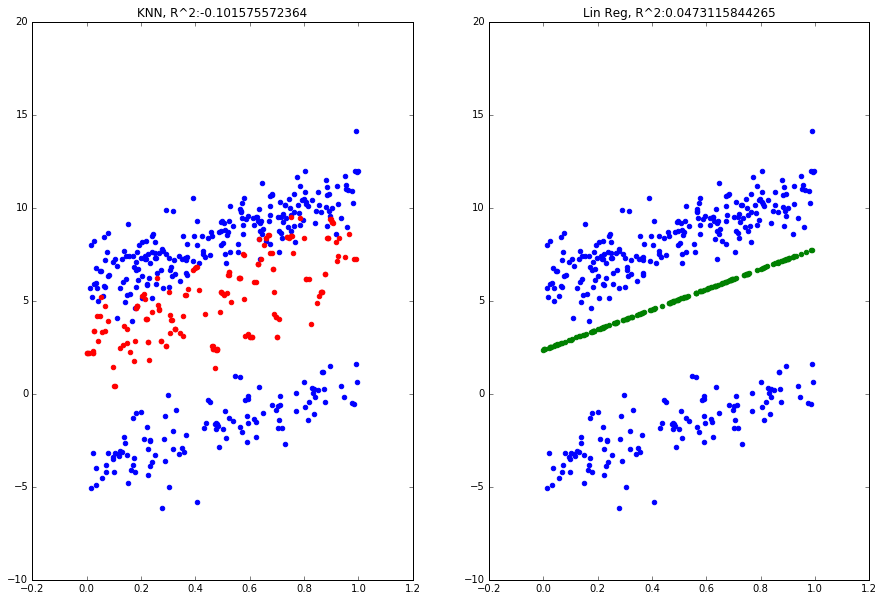

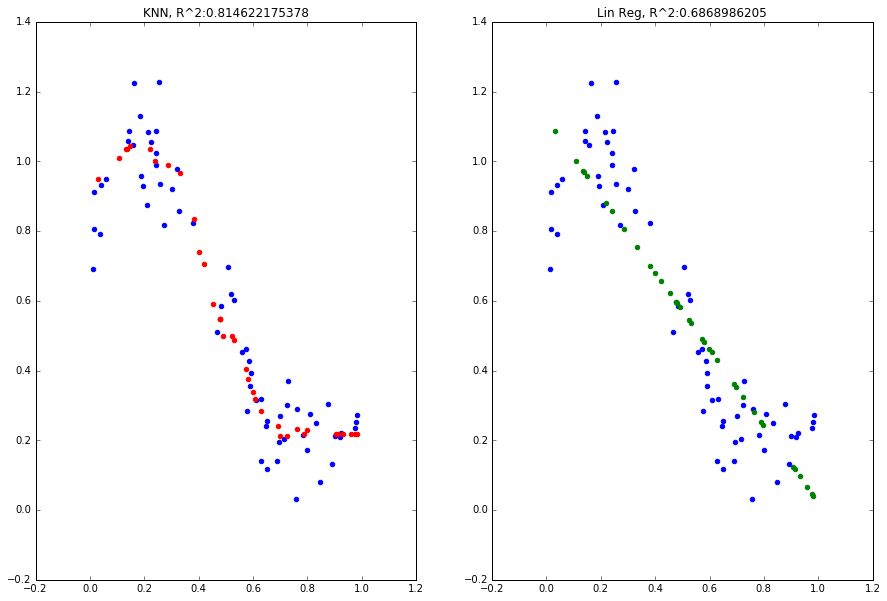

In [121]:
#number of neighbours
k=10

### CODING TIP: You have to generate data for six different datasets, is it a good idea
### to copy and paste the same block of code over and over again for six times? 
### How can you get around this?
### For HW2 it's still ok to copy and paste, for HW3, we will need you to see where functional
### abstraction and iteration are called for and implement them.


#plot predicted points
# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

#create function to loop through all files in directory
#or maybe just take the number of files in the set as the parameter
# inputs: filenames or directory or number of files
# return: datasets
def dataset_creation(num_files):
    for i in range(1,num_files):
        ds_missingname = './dataset/dataset_'+str(i)+'_missing.txt'
#         print ds_missingname
        ds_fullname = './dataset/dataset_'+str(i)+'_full.txt'

        #Read dataset 

        missing_df = pd.read_csv(ds_missingname)
        full_df = pd.read_csv(ds_fullname)
        dataset_plotter(missing_df, full_df,num_files)
    
    return missing_df, full_df

#create function to loop through datasets and plot results
# input: datasets
# return: null
# note that this function will have an output of plots, but return nothing
def dataset_plotter(missing_df, full_df,num_files):
    
#     for i in range(1,num_files):

        no_y_ind = missing_df[missing_df['y'].isnull()].index
        with_y_ind = missing_df[missing_df['y'].notnull()].index

        predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                no_y_ind, 
                                with_y_ind, 
                                k)

        predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind)

    #plot predicted points
#     fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

   
        #dynamically number axes
#         j=dataset.length
#         x_axis = "ax"+str(j)
#         j+=1
#         y_axis = "ax"+str(j)

        #plot predicted points
        # TODO replace with look that build the below line based on number of files
        fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 10))

        ax1, ax2 = plot_missing(ax1, 
                        ax2, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k,
                        no_y_ind, 
                        with_y_ind)
    
#     return null
num_files=5
missing_df, full_df = dataset_creation(num_files)
# missing_df.shape()
# dataset_plotter(missing_df, full_df,num_files)
plt.show()

### Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression
KNN might perform better than linear regression in the case of clustered data.  We can see this above in the second chart.

### under which linear regression performs better than KNN 
The last chart shows where linear regression appears to be working more effectively.  The strange tails on the KNN don't seem to fit with the overall trend of the data.

### under which both perform equally well  
The first dataset seems to show them both working pretty well.  It seems to have closely grouped datapoints with not too many outliers

### under which both perform equally poorly. 
They both seem to be working poorly on the third set.  I would guess that it's becauses of the very prononounced bi-modal distribution of the data.


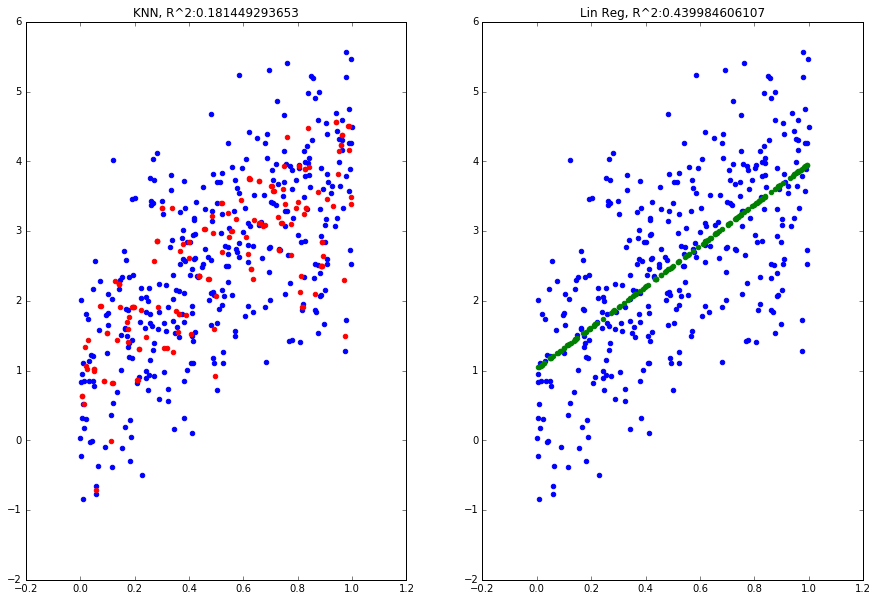

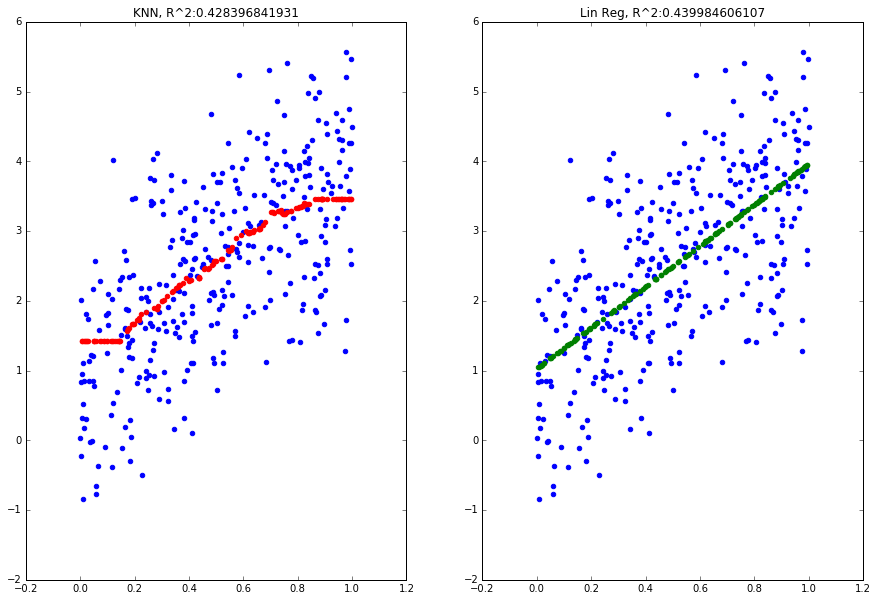

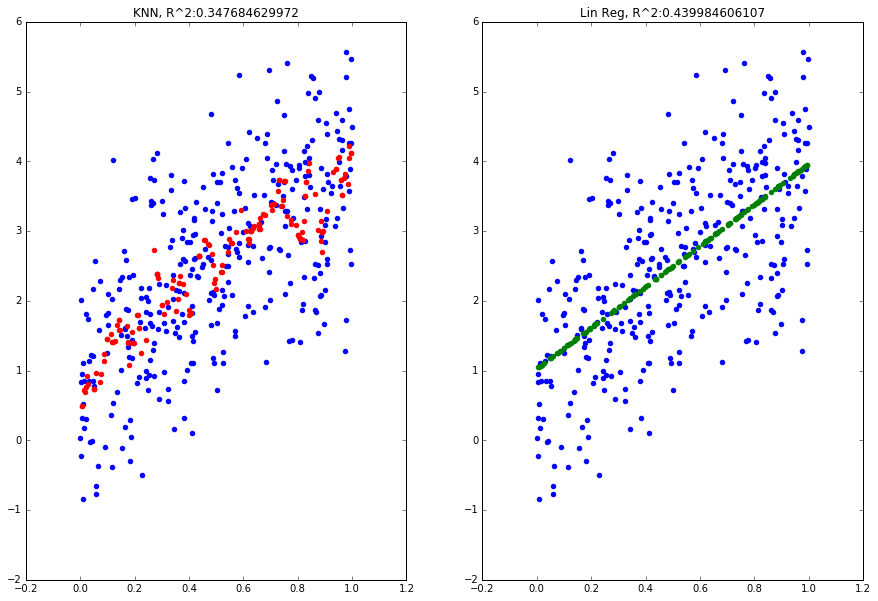

In [153]:
#we'll try a few different versions of k to answer the next question
#number of neighbours
missing_df = pd.read_csv('./dataset/dataset_1_missing.txt')
full_df = pd.read_csv('./dataset/dataset_1_full.txt')
k=2
dataset_plotter(missing_df, full_df,1)
plt.show()
k=100
dataset_plotter(missing_df, full_df,1)
plt.show()
k=10
dataset_plotter(missing_df, full_df,1)
plt.show()

### Using dataset_1_missing.txt, explain the impact of the choice of k on the performance of KNN.
In dataset 1 we have a number of closely grouped data points.  As we increase k, the performance of our nearest neighbor algorithm will improve.  However, at some point, it will start to degrade with such a small dataset.  This is because all the points will become nearest neighbors, fuzzying the results.  This can be seen in the left hand charts above where we see convergence on the linear regression as we increase k. Our R^2 indicates the model has been overfit with a higher K in this case.

## Problem 3: Is the Best (Linear Model) Good Enough?

In this problem, we will specifically look at conditions under which linear regression excels or fails.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

### Part (a): Introduction to Residual Plots

- Read ``dataset_1_full.txt``. Visualize the dataset and make some initial observations.


- For this data set, what can you say about the following linear fits: 

    1. slope = 0.4, intercept = 0.2
    2. slope = 0.4, intercept = 4
    3. linear regression model


- In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values along with  residuals, as well as a residual histogram. What do these plots reveal?  


- Calculate the R^2 coefficient for all three fits. What do the erors reveal? How do they compare to the residual plots?

**Solution:**

          x         y
0  0.177418  1.401178
1  0.573076  3.489890
2  0.503775  1.684924
3  0.594027  3.898209
4  0.335754  2.878410
                x           y
count  500.000000  500.000000
mean     0.508327    2.540550
std      0.294466    1.313217
min      0.000133   -1.308618
25%      0.258050    1.654389
50%      0.500938    2.589774
75%      0.772561    3.506135
max      0.999833    6.983976


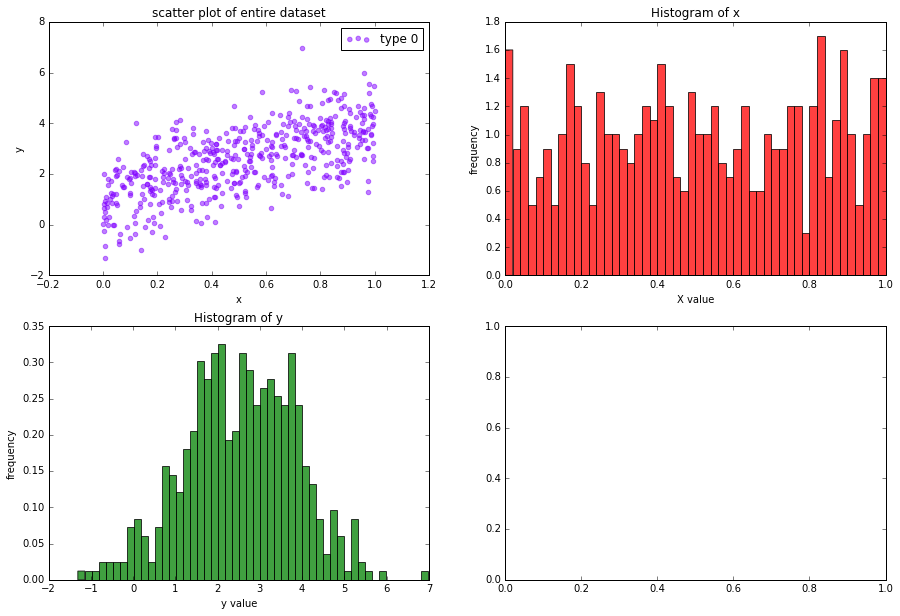

In [158]:
#read data
df = pd.read_csv('dataset/dataset_1_full.txt')
#visualize data in text format
print df.head()
print df.describe()

#colors
import matplotlib.colors as colors
import matplotlib.cm as cmx

#visualize data graphically
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))


#scatter
plot_scatter(df, 'scatter plot of entire dataset', 'x', 'y', 1, ax1)
# ax1.scatter(df['x'].values, 
#                 df['y'].values, 
#                 color='blue')


#reuse histogram function from homework 1
#function for plotting histograms
def plot_hist(data, title, x_label, face, axes):
    
    axes.hist(data, 
         50, 
         normed=1, 
         facecolor=face, 
         alpha=0.75)
    
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel('frequency')
    
    return axes

# x histogram
ax2 = plot_hist(df['x'].values,
                'Histogram of x', 
                'X value', 
                'red', 
                ax2)

# y histogram
ax3 = plot_hist(df['y'].values,
                'Histogram of y', 
                'y value', 
                'green', 
                ax3)

# add lines with the slopes to first plot

#slope = 0.4, intercept = 0.2


#slope = 0.4, intercept = 4


#linear regression model


# ax1.plot(df['x'].values, df['y'].values, label='Estimated Y')
plt.show()


### Initial Observations
There seems to be a linear trend in the scatter plot moving up and to the right.
There seems to be a correlation that y increases as x increases in the scatter plot.
The x histogram doesn't seem to fit the normal distribution.  It appears random.
The y histogram seems to fit the normal distribution.

#The following linear fits:
First one is ???
Second one is ???
Based on our linear regression of this dataset that we did in problem 2, with an R^2 of .43, I'd say it not a great fit.  However, relative to the others ???

In [ ]:
# visualize the fit

#compute the residuals 

#make a residual plot of predicted values along with residuals

#residual histogram. 

### What do the above plots reveal?


In [ ]:
#Calculate the R^2 coefficient for all three fits. 


### What do the erors reveal? 

### How do they compare to the residual plots?

### Part (b): What do Residual Plots Reveal?

- Read datasets ``dataset_2_full.txt`` through ``dataset_6_full.txt``. In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values along with  residuals, as well as a residual histogram. What do these plots reveal about the fit of the model? 


- Calculate the R^2 coefficient each fit. What do the erors reveal? How do they compare to the residual plots?


- Based on your analysis, form conjectures regarding the precise relationship between the residual plots and the fit of the linear regression model. Conjecture on the precise conditions under which linear regression model is an appropriate model for a given dataset.

**Solution:**

---

## Challenge Problem: Combining Random Variables

This problem, we explore the distirbution of random variables that result from combining other random variables.

### Part (a): Adding Two Uniformly Distributed Variables

Consider the independent random variables $X\sim U(0, 1)$ and $Y\sim U(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

### Part (b): Adding Multiple Uniformly Distributed Variables

Consider three independent random variables $X_1, X_2, X_3 \sim U(0, 1)$. Let $Z$ be the random variable $Z = X_1 + X_2 + X_3$. 

What is the distribution of $Z$? What if you add 10 or 12 independent (standard) uniformly distributed variables? Conjecture on the distribution of 
$$
Z = \lim_{n\to \infty} \sum_{i=1}^n X_i
$$
where $\left\{X_i \right\}$ are independent (standard) uniformly distributed variables.

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

### Part (c): Combining Normally Distributed Variables

Consider the independent random variables $X\sim \mathcal{N}(0, 1)$ and $Y\sim \mathcal{N}(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** use properties of expected value and some experimentation.

**Solution:**

### Part (d): Product of Normally Distributed Variables

Is the product of two normally distributed variables a normally distributed variable? You should fully explain and support your conlusion. 

**Solution:**

---